<a href="https://colab.research.google.com/github/Atzingen/IA-FIC2021/blob/main/01_notebook_e_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1a Aula - Exemplo tensorflow / mnist

## Como notebooks Funcionam

Mais informações nas referências abaixo:

* [Introdução Ao Jupyter Notebook](https://https://www.letscode.com.br/blog/introducao-ao-jupyter-notebook)

* [Site do Jupyter Notebook](https://jupyter.org/)

* [Anaconda](https://www.anaconda.com/products/individual-d)

* [Google Colab](https://colab.research.google.com/)

In [10]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets

In [11]:
(x_train, y_train_raw), (x_test, y_test_raw) = datasets.mnist.load_data()

In [12]:
input_shape = (28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [15]:
print(y_train[0])
print(np.argmax(y_train[0]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [16]:
print(x_train[0].shape)
# print(x_train[0])

(28, 28)


Image shape: (28, 28)


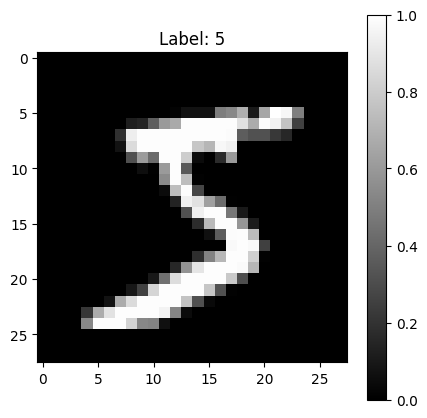

In [17]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()
plt.title(f"Label: {y_train_raw[0]}")

# Print the shape of the image for reference
print(f"Image shape: {x_train[0].shape}")

In [18]:
@interact(i=10) # O interact tem problemas para rodar no vscode
def plot_image(i):
  # plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  fig = px.imshow(x_train[i], title=str(y_train[i]) + " -> " + str(y_train_raw[i]), width=800, height=800)
  fig.show()

interactive(children=(IntSlider(value=10, description='i', max=30, min=-10), Output()), _dom_classes=('widget-…

In [19]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Gustavo\miniconda3\envs\tf\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [20]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
model.fit(x=x_train, y=y_train, validation_split=0.3, epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9126 - loss: 0.3036 - val_accuracy: 0.9529 - val_loss: 0.1711
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9586 - loss: 0.1382 - val_accuracy: 0.9608 - val_loss: 0.1339
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9712 - loss: 0.0937 - val_accuracy: 0.9644 - val_loss: 0.1165
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9796 - loss: 0.0692 - val_accuracy: 0.9674 - val_loss: 0.1094
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0523 - val_accuracy: 0.9692 - val_loss: 0.1048
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9882 - loss: 0.0405 - val_accuracy: 0.9685 - val_loss: 0.1075
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9912 - loss: 0.0311 - val_accuracy: 0.9722 - val_loss: 0.0967
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0260 - 

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.9753000140190125


In [23]:
model.save('mnist_model.h5')

# Esta parte funciona apenas no colab

In [27]:
from IPython.display import display, Javascript
from base64 import b64decode
import os

def take_photo(filename='photo.jpg', quality=0.8):
  # Check if running in Colab
  try:
    from google.colab.output import eval_js
    import google.colab
    in_colab = True
  except ImportError:
    in_colab = False
  
  if in_colab:
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
    return filename
  else:
    # For local Jupyter notebook, use OpenCV to capture from webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
      raise Exception("Could not open camera")
    
    print("Press SPACE to capture photo, ESC to exit")
    while True:
      ret, frame = cap.read()
      if not ret:
        break
      
      cv2.imshow('Camera - Press SPACE to capture, ESC to exit', frame)
      key = cv2.waitKey(1) & 0xFF
      
      if key == 32:  # SPACE key
        cv2.imwrite(filename, frame)
        print(f"Photo saved as {filename}")
        break
      elif key == 27:  # ESC key
        break
    
    cap.release()
    cv2.destroyAllWindows()
    return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err: 
  print(str(err))

In [ ]:
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (28, 28))
img = img/255.0
img = np.expand_dims(img, axis=0)
img=img.reshape(img.shape[0], img.shape[1], img.shape[2], 1)

In [ ]:
resultado_one_hot = model.predict(img)
print(resultado_one_hot, np.argmax(resultado_one_hot))